In [1]:
import pandas as pd


columna=['x','y']
x=[1,2,2,3,4,4,5,6]
y=[2,3,4,4,4,6,5,7]

diccionario={columna[0]:x,
             columna[1]:y}

df=pd.DataFrame(diccionario)

df['x*y']=df['x']*df['y']

df['x**2']=df['x']**2



print(df)


   x  y  x*y  x**2
0  1  2    2     1
1  2  3    6     4
2  2  4    8     4
3  3  4   12     9
4  4  4   16    16
5  4  6   24    16
6  5  5   25    25
7  6  7   42    36


In [2]:
#suma
total=df.sum()
total_df = pd.DataFrame(total).transpose()

total_df.index = ['Total']

total_df


,x,y,x*y,x**2
Total,27,35,135,111


In [3]:
df

,x,y,x*y,x**2
0,1,2,2,1
1,2,3,6,4
2,2,4,8,4
3,3,4,12,9
4,4,4,16,16
5,4,6,24,16
6,5,5,25,25
7,6,7,42,36


In [4]:
def pendiente_intercepto(df, x_col, y_col):
    n = len(df)
    sum_x = df[x_col].sum()
    sum_y = df[y_col].sum()
    sum_xy = (df[x_col] * df[y_col]).sum()
    sum_x2 = (df[x_col] ** 2).sum()
    #  pendiente m
    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)

    #  intercepto b
    b = (sum_y - m * sum_x) / n

    return m, b


In [5]:
m,b= pendiente_intercepto(df,'x','y')
print(m,b)

0.8490566037735849 1.5094339622641506


In [6]:

print(f"La ecuación de regresión lineal es: y = {m}x + {b}")

def regresion_lineal(x):
    return m * x + b


La ecuación de regresión lineal es: y = 0.8490566037735849x + 1.5094339622641506


In [7]:
print(regresion_lineal(3))

4.056603773584905


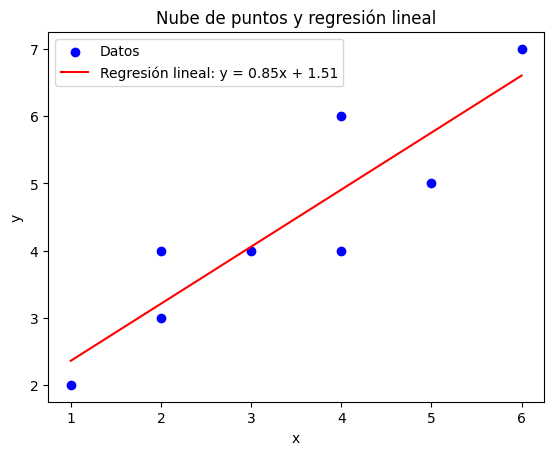

In [8]:
import matplotlib.pyplot as plt

plt.scatter(df['x'], df['y'], color='blue', label='Datos')

plt.plot(df['x'], m * df['x'] + b, color='red', label=f'Regresión lineal: y = {m:.2f}x + {b:.2f}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Nube de puntos y regresión lineal')
plt.legend()

# gráfico
plt.show()

In [9]:

df['y_pred'] = m * df['x'] + b


df['error'] = df['y'] - df['y_pred']

df['error_cuadrado']=df['error']**2

sr = df['error_cuadrado'].sum()

df['error absoluto']=df['error_cuadrado'].abs()


print(f"El valor de Sr (suma de los residuos al cuadrado) es: {sr}")

El valor de Sr (suma de los residuos al cuadrado) es: 3.5471698113207544


In [10]:
df

,x,y,x*y,x**2,y_pred,error,error_cuadrado,error absoluto
0,1,2,2,1,2.358491,-0.358491,0.128515,0.128515
1,2,3,6,4,3.207547,-0.207547,0.043076,0.043076
2,2,4,8,4,3.207547,0.792453,0.627981,0.627981
3,3,4,12,9,4.056604,-0.056604,0.003204,0.003204
4,4,4,16,16,4.905660,-0.905660,0.820221,0.820221
5,4,6,24,16,4.905660,1.094340,1.197579,1.197579
6,5,5,25,25,5.754717,-0.754717,0.569598,0.569598
7,6,7,42,36,6.603774,0.396226,0.156995,0.156995


In [11]:
def mse (sr,df):
    n=len(df)
    return sr/n

resultado_mse=mse(sr,df)
resultado_mse


0.4433962264150943

In [12]:
def RMSE (mse):
    return mse ** 0.5

resultado_RMSE=RMSE(resultado_mse)
resultado_RMSE

0.6658800390574073

In [13]:


def MAE (df):
    n=len(df)
    mae=(df['error absoluto'].sum())/n
    return mae

resultado_mae=MAE(df)
resultado_mae

0.4433962264150943